In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [45]:
data = pd.read_excel("xyseries.xls")

data

,X,Y
0,11.034430,0.239293
1,11.107354,0.962884
2,9.914969,-2.124441
3,9.911697,-1.972051
4,10.887862,-1.759939
...,...,...
495,11.581292,1.069054
496,12.734498,-1.463218
497,11.569178,3.013655
498,11.923236,0.013895


# Q5 a

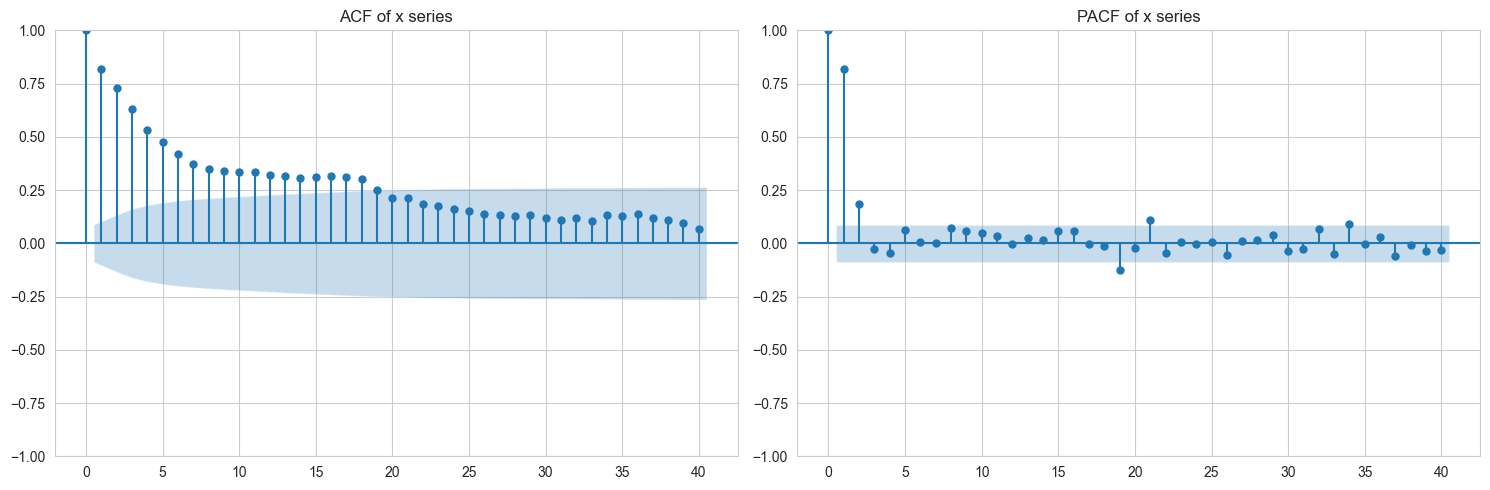

step: 1 acf: 0.817782529880994 pacf: 0.8194213726262464
step: 2 acf: 0.7292252247890982 pacf: 0.18475942868418654
step: 3 acf: 0.6287034700495885 pacf: -0.025193810516304108
step: 4 acf: 0.5334200180325661 pacf: -0.046345695968907336
step: 5 acf: 0.4768274756167297 pacf: 0.06553753932297263
step: 6 acf: 0.41809329012707563 pacf: 0.007861864072577189
step: 7 acf: 0.3706523504423011 pacf: 0.0024512919246744706
step: 8 acf: 0.3509622749960757 pacf: 0.07218172092810142
step: 9 acf: 0.33807835338690295 pacf: 0.06018659060213284
step: 10 acf: 0.3354972921589261 pacf: 0.04923748617031634
step: 11 acf: 0.3347300316457222 pacf: 0.03447464267975726
step: 12 acf: 0.3225195222325527 pacf: -0.0035491811033033717
step: 13 acf: 0.3171713324221665 pacf: 0.025678961375350244
step: 14 acf: 0.3070303170943725 pacf: 0.015302828532424479
step: 15 acf: 0.3095591718216473 pacf: 0.05836477042565529
step: 16 acf: 0.3177271978289735 pacf: 0.060580835298263934
step: 17 acf: 0.3113509107924697 pacf: -0.0013284664

In [ ]:

# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(data["X"], lags=40, ax=axes[0], title="ACF of x series")
plot_pacf(data["X"], lags=40, ax=axes[1], title="PACF of x series")

acf_values = acf(data["X"], nlags=48, fft=False)
pacf_values = pacf(data["X"], nlags=48)

plt.tight_layout()
plt.show()

for x in range(1, 25):
    print("step:" , x , "acf:" , acf_values[x] , "pacf:" , pacf_values[x])
    # print("\n")§


# Q5 b

AR(1) model seems appropriate due to strong pacf at 1 and 2

# Q5 c

                               SARIMAX Results                                
Dep. Variable:                      X   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -712.880
Date:                Thu, 22 Jan 2026   AIC                           1431.761
Time:                        17:07:53   BIC                           1444.405
Sample:                             0   HQIC                          1436.722
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3848      0.253     41.103      0.000       9.890      10.880
ar.L1          0.8207      0.025     33.102      0.000       0.772       0.869
sigma2         1.0115      0.062     16.413      0.0

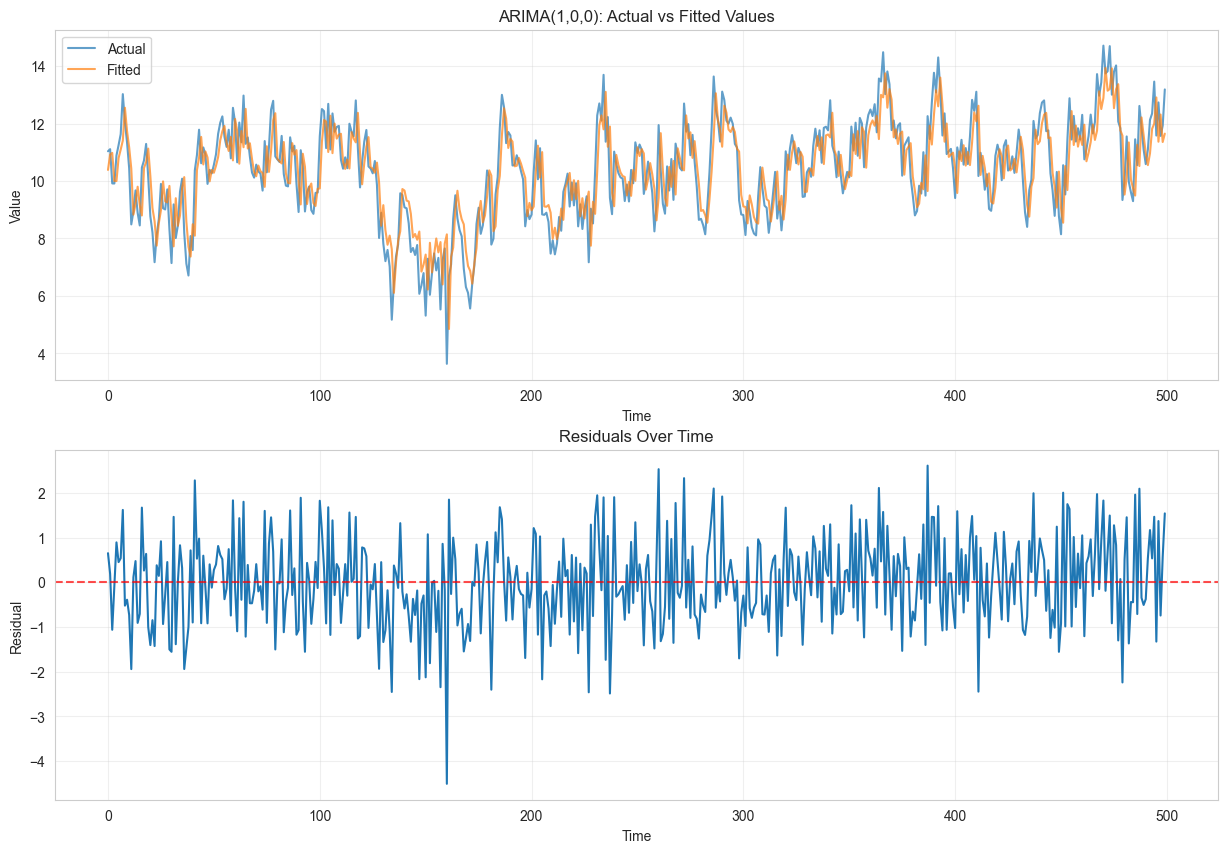

In [47]:
# Fit ARIMA(1,0,0) model
model = ARIMA(data["X"], order=(1, 0, 0))
fitted_model = model.fit()

# Display model summary
print(fitted_model.summary())

# Get fitted values and residuals
fitted_values = fitted_model.fittedvalues
residuals = fitted_model.resid

# Plot 1: Actual vs Fitted values
fig, axes = plt.subplots(2, figsize=(15, 10))

# Actual vs Fitted
axes[0].plot(data["X"].values, label='Actual', alpha=0.7)
axes[0].plot(fitted_values.values, label='Fitted', alpha=0.7)
axes[0].set_title('ARIMA(1,0,0): Actual vs Fitted Values')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals over time
axes[1].plot(residuals.values)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1].set_title('Residuals Over Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Residual')
axes[1].grid(True, alpha=0.3)

# Q5 d

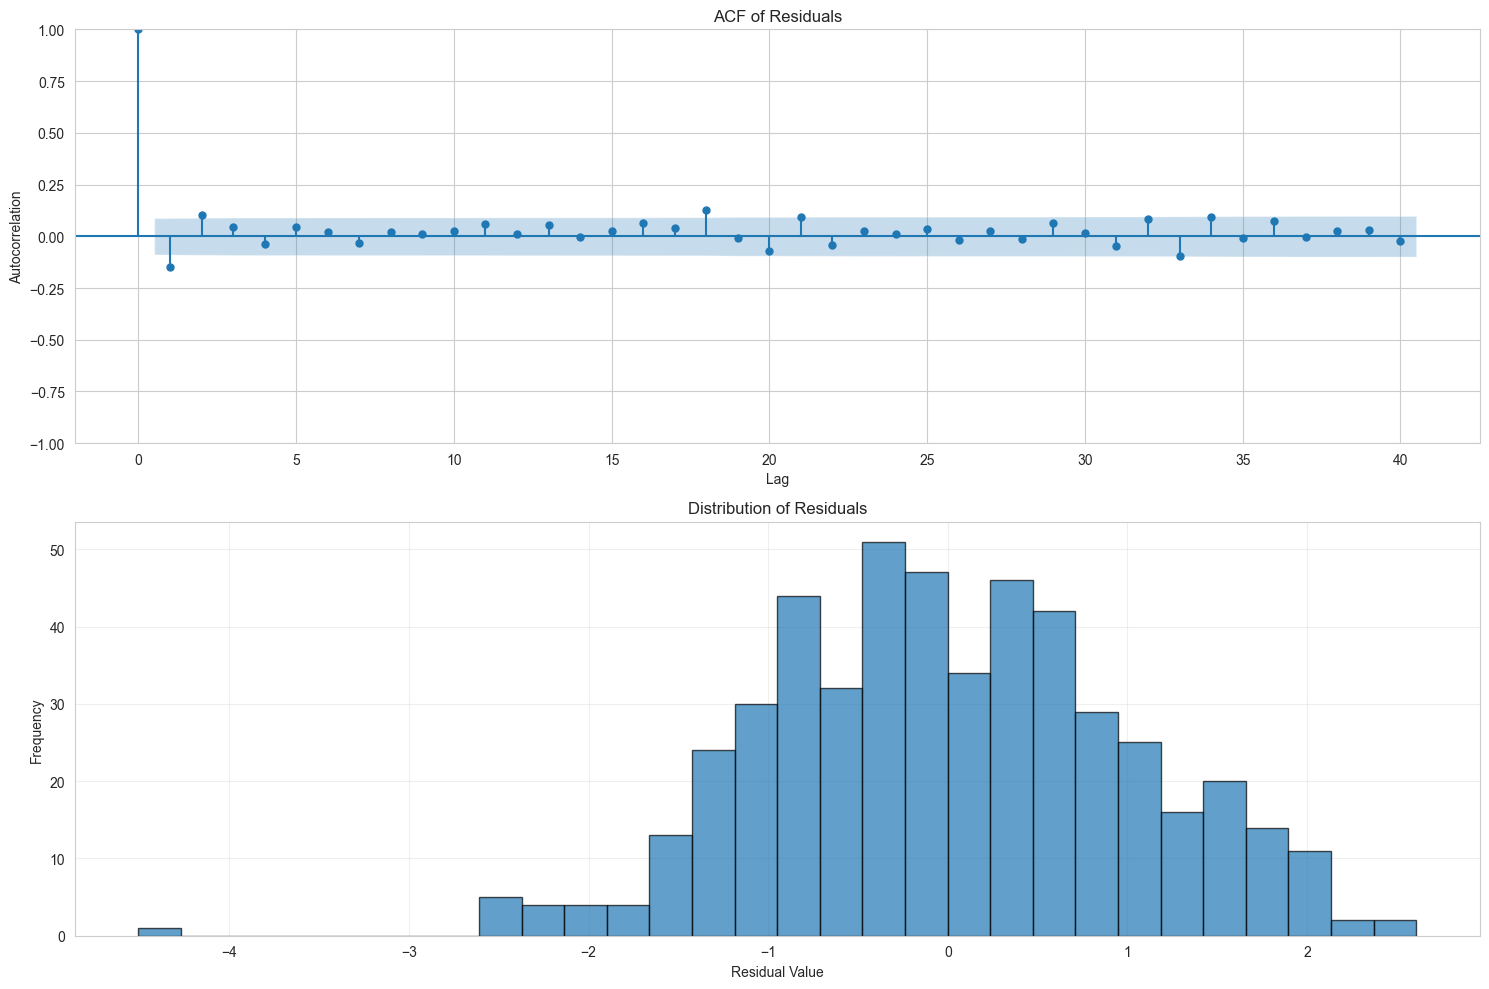

step: 1 acf: -0.14719513493645364
step: 2 acf: 0.10422200907066506
step: 3 acf: 0.04518869625726269
step: 4 acf: -0.038270648824626316
step: 5 acf: 0.0460659964178702
step: 6 acf: 0.019491313717915543
step: 7 acf: -0.03069816892614178
step: 8 acf: 0.022865095010950468
step: 9 acf: 0.009940563264593406
step: 10 acf: 0.026756125105968545
step: 11 acf: 0.05933463851893259
step: 12 acf: 0.012900421400133245
step: 13 acf: 0.05277409993178985
step: 14 acf: -0.0047554942747472136
step: 15 acf: 0.025360471718340476
step: 16 acf: 0.06552063882943468
step: 17 acf: 0.039161675820543425
step: 18 acf: 0.12725122358400623


In [48]:
# Fit ARIMA(1,0,0) model
model = ARIMA(data["X"], order=(1, 0, 0))
fitted_model = model.fit()

# Display model summary

# Get fitted values and residuals
fitted_values = fitted_model.fittedvalues
residuals = fitted_model.resid

# Plot 1: Actual vs Fitted values
fig, axes = plt.subplots(2, figsize=(15, 10))

# Residuals ACF
plot_acf(residuals, lags=40, ax=axes[0], title='ACF of Residuals')
residuals_acf = acf(residuals, nlags=48, fft=False)
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autocorrelation')

# Residuals histogram
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Residuals')
axes[1].set_xlabel('Residual Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

for x in range(1, 19):
    print("step:" , x , "acf:" , residuals_acf[x])

The ARIMA(1,0,0) (AR(1)) model appears to fit the data well. The residuals behave like white noise, which is intended.

# Q5 e

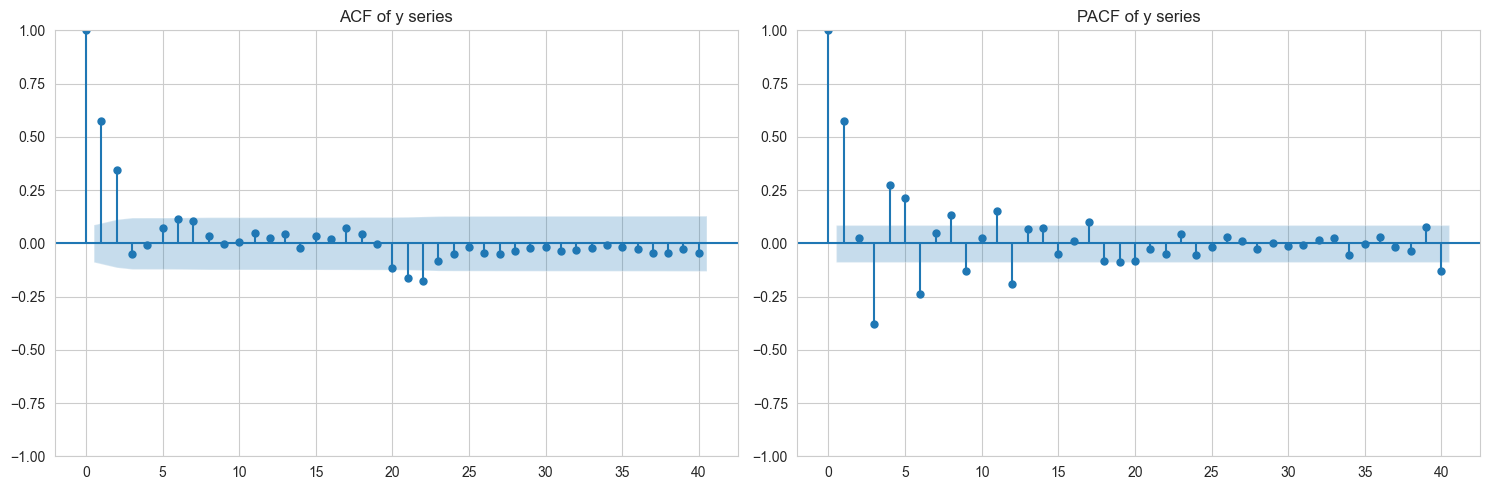

step: 1 acf: 0.5732009357359094 pacf: 0.5743496350059211
step: 2 acf: 0.3438851850357141 pacf: 0.02296408026686111
step: 3 acf: -0.048916895104659866 pacf: -0.3824471182819558
step: 4 acf: -0.008172172355119509 pacf: 0.2753398984837713
step: 5 acf: 0.07136336592030139 pacf: 0.2161131948212804
step: 6 acf: 0.11575112283641224 pacf: -0.24223190161869965
step: 7 acf: 0.10610636978979761 pacf: 0.04890387445535571
step: 8 acf: 0.035881145847952836 pacf: 0.13990075029166732
step: 9 acf: -0.001741760612039439 pacf: -0.1358504971068588
step: 10 acf: 0.00393512660556683 pacf: 0.022965956840137594
step: 11 acf: 0.04849000440443671 pacf: 0.16337604261996674
step: 12 acf: 0.023839246770542114 pacf: -0.20138552885827932
step: 13 acf: 0.0442680784367123 pacf: 0.06813659392866506
step: 14 acf: -0.021487438794835736 pacf: 0.08486986064105902
step: 15 acf: 0.03251417164719563 pacf: -0.05891598210364262
step: 16 acf: 0.01897462670237418 pacf: 0.00873070922595996
step: 17 acf: 0.07125411695432644 pacf: 0

In [49]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(data["Y"], lags=40, ax=axes[0], title="ACF of y series")
plot_pacf(data["Y"], lags=40, ax=axes[1], title="PACF of y series")

acf_values = acf(data["Y"], nlags=48, fft=False)
pacf_values = pacf(data["Y"], nlags=48)

plt.tight_layout()
plt.show()

for x in range(1, 25):
    print("step:" , x , "acf:" , acf_values[x] , "pacf:" , pacf_values[x])
    # print("\n")


The Y series pattern suggests an AR(2) process, similar to the X series. The negative PACF at lag 3 is unusual but may not be significant enough to require a more complex model athough after some experimentation an ARMA (2,3) appeared to be best.

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  500
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -725.502
Date:                Thu, 22 Jan 2026   AIC                           1465.004
Time:                        17:07:54   BIC                           1494.506
Sample:                             0   HQIC                          1476.581
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0217      0.134      7.627      0.000       0.759       1.284
ar.L1          0.7567      0.342      2.210      0.027       0.085       1.428
ar.L2          0.0920      0.052      1.774      0.0

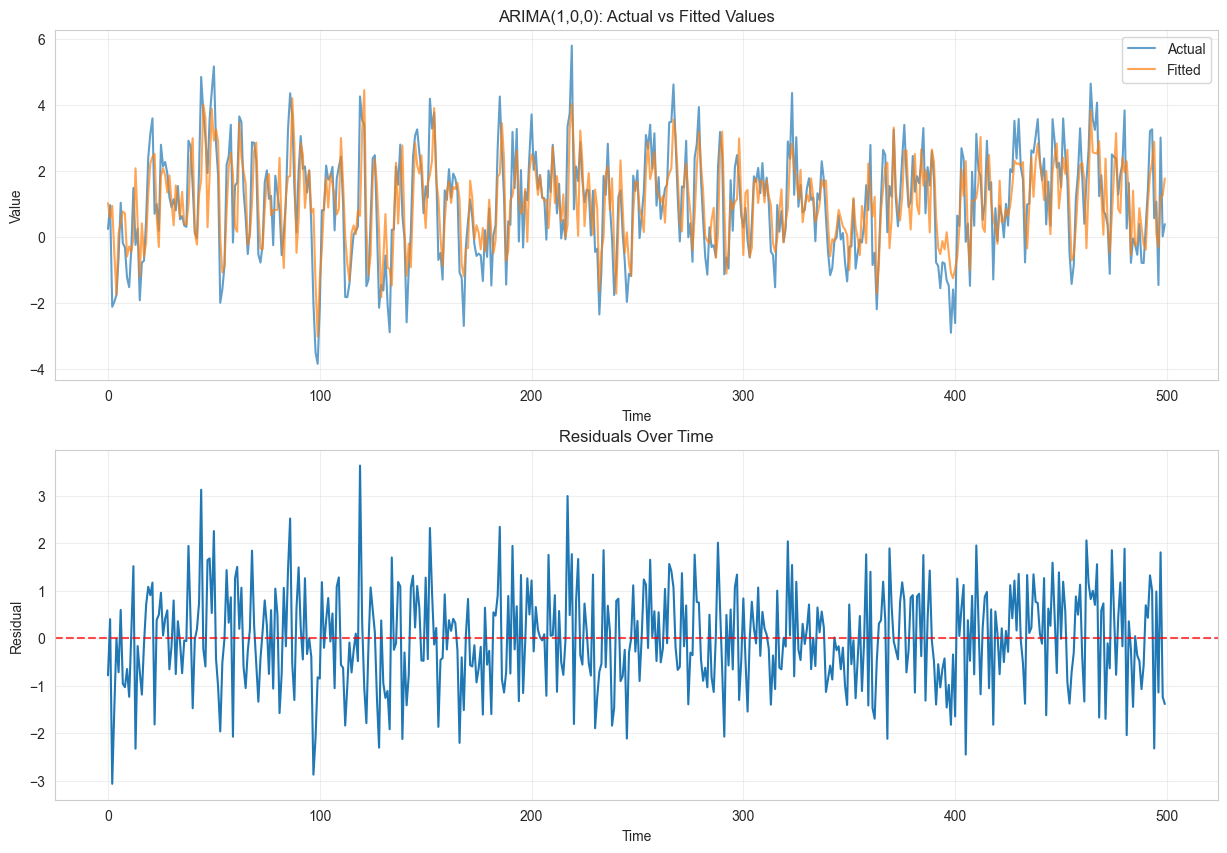

In [50]:
# Fit ARIMA(1,0,0) model
model = ARIMA(data["Y"], order=(2, 0, 3))
fitted_model = model.fit()

# Display model summary
print(fitted_model.summary())

# Get fitted values and residuals
fitted_values = fitted_model.fittedvalues
residuals = fitted_model.resid

# Plot 1: Actual vs Fitted values
fig, axes = plt.subplots(2, figsize=(15, 10))

# Actual vs Fitted
axes[0].plot(data["Y"].values, label='Actual', alpha=0.7)
axes[0].plot(fitted_values.values, label='Fitted', alpha=0.7)
axes[0].set_title('ARIMA(1,0,0): Actual vs Fitted Values')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals over time
axes[1].plot(residuals.values)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1].set_title('Residuals Over Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Residual')
axes[1].grid(True, alpha=0.3)

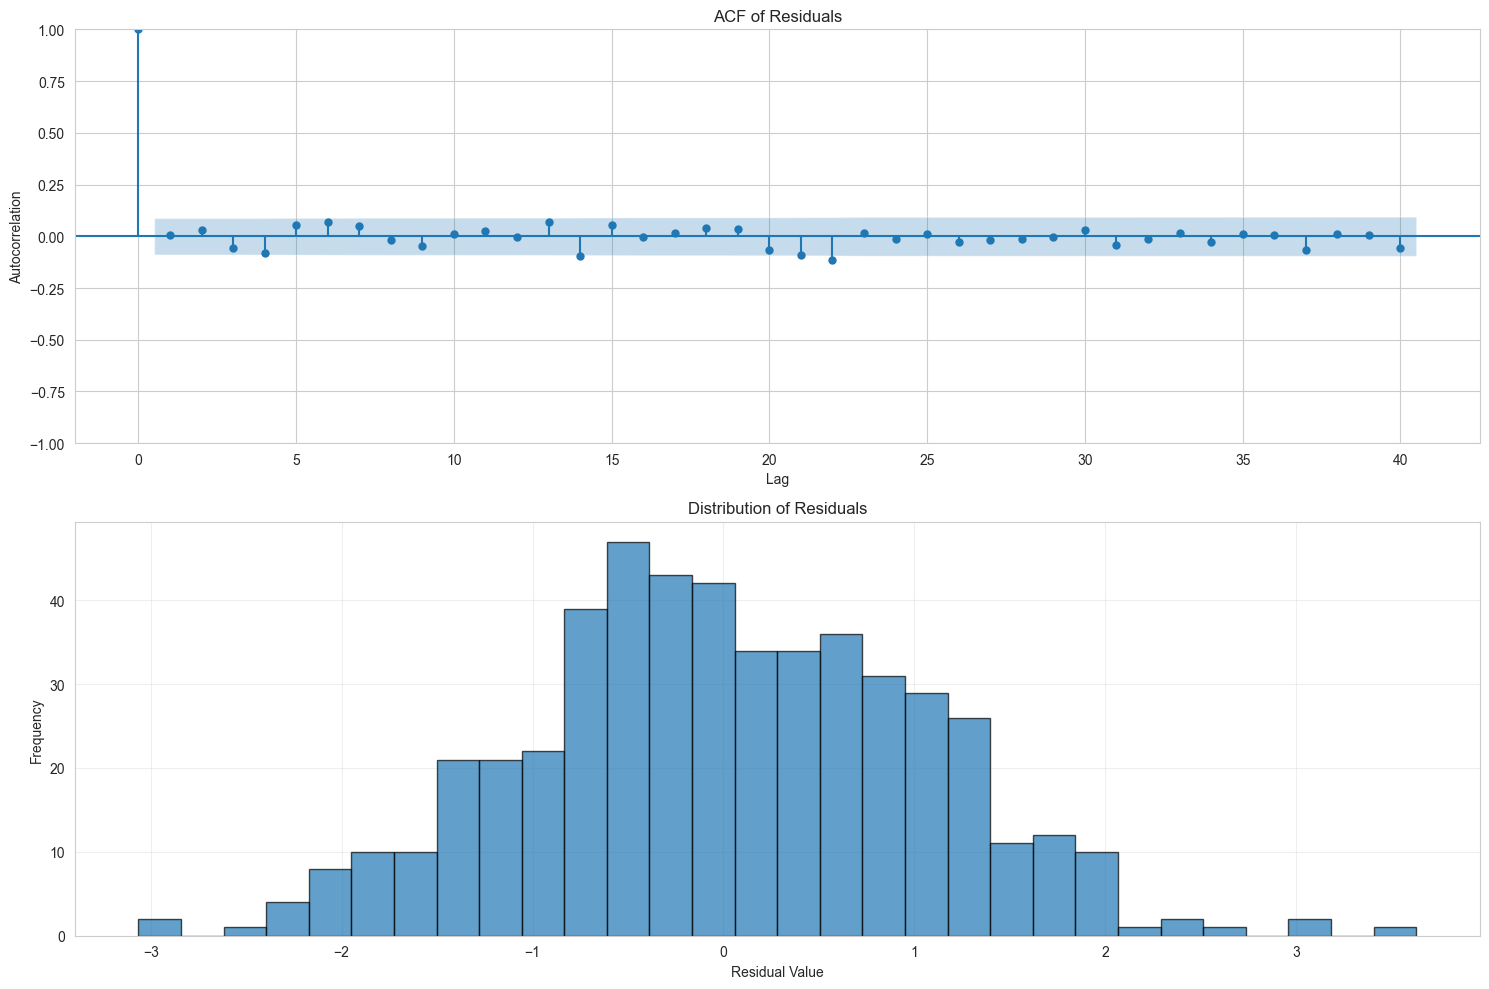

step: 1 acf: 0.007099337963927722
step: 2 acf: 0.031071769300966674
step: 3 acf: -0.055307227533398735
step: 4 acf: -0.08298192554263373
step: 5 acf: 0.05690922242281265
step: 6 acf: 0.06805345940443104
step: 7 acf: 0.051313678848787146
step: 8 acf: -0.01737879281816866
step: 9 acf: -0.046655937265106105
step: 10 acf: 0.01023320997280683
step: 11 acf: 0.027462625735128168
step: 12 acf: -0.003821369924962626
step: 13 acf: 0.06876409676424498
step: 14 acf: -0.0933700503630679
step: 15 acf: 0.05559445832987527
step: 16 acf: -0.0014018117312903243
step: 17 acf: 0.017375046088325078
step: 18 acf: 0.03981240554260118


In [51]:
# # Fit ARIMA(1,0,0) model
# model = ARIMA(data["Y"], order=(1, 0, 0))
# fitted_model = model.fit()

# Display model summary

# Get fitted values and residuals
fitted_values = fitted_model.fittedvalues
residuals = fitted_model.resid

# Plot 1: Actual vs Fitted values
fig, axes = plt.subplots(2, figsize=(15, 10))

# Residuals ACF
plot_acf(residuals, lags=40, ax=axes[0], title='ACF of Residuals')
residuals_acf = acf(residuals, nlags=48, fft=False)
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autocorrelation')

# Residuals histogram
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Residuals')
axes[1].set_xlabel('Residual Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

for x in range(1, 19):
    print("step:" , x , "acf:" , residuals_acf[x])